# Crime rates in Austin throughout the past 5 Years

I am interested in investigating the crime rates in Travis County over the past few years and the attributes of each crime. In particular, I will look at the prevalence of various types of crimes, such as domestic violence and indecent exposure, and I will visualize the volume of crimes occurring each year. My goal is to assess the trends in crime prevalence and the types of crime that occur most often.

This analysis is important to me because crime affects millions every year, so it must be analyzed to create effective prevention and control policies. Austin is notoriously crime-ridden, having the 15th biggest homicide rate, problem, per [Fox](https://www.fox7austin.com/news/austin-named-city-with-15th-biggest-homicide-rate-problem-study). Property crimes are also high, and it is not uncommon for one's personal belongings to be stolen. With such a pronounced presence of crime, measures must be taken with great precedence.

The dataset I will use is a public database of reported crimes from 2003 to the present day.

The database can be found [here](https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu).

I will compare crime rates between each year and see if there are general trends in types of crimes as well as overall crime occurrence.

*Note: This analysis will touch on subjects like sexual assault, murder, and child abuse. These topics may be disturbing or upsetting to some, so please take caution!*

---

In [248]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
%config InlineBackend.figure_format = 'retina'
# set font size for data visualization
font_size = 12

---

# Data Processing - Loading Data

I am using data from a single dataset and splitting it into multiple datasets, based on year, using Python.

The dataset contains crime data from the past 20 years (2003 - 2023). There are a multitude of columns to describe the reported crime, such as:


*   Incident number
*   Offense code/description
*   Occurrence data/time
*   Location
*   Family violence (Y/N)

I will be using data from the past 6 years, including 2023. Each dataset can be found [here](https://drive.google.com/drive/folders/10oq_HTrkfqoZMfj_J9MJ1a6vlOlxHWYi?usp=drive_link).





In [ ]:
# this took FOREVER (close to an hour), so only do this if absolutely needed.
uploaded = files.upload()

In [ ]:
crime = pd.read_csv('Crime_Reports.csv')

In [ ]:
# this is where I split the dataset according to the year each crime occurred.
crime_dates = crime.loc[:, 'Occurred Date']
crime_date2023 = crime_dates.str.contains('2023')
crime_date2022 = crime_dates.str.contains('2022')
crime_date2021 = crime_dates.str.contains('2021')
crime_date2020 = crime_dates.str.contains('2020')
crime_date2019 = crime_dates.str.contains('2019')
crime_date2018 = crime_dates.str.contains('2018')

In [ ]:
crime_2023 = crime[crime_date2023]
crime_2022 = crime[crime_date2022]
crime_2021 = crime[crime_date2021]
crime_2020 = crime[crime_date2020]
crime_2019 = crime[crime_date2019]
crime_2018 = crime[crime_date2018]

In [ ]:
# convert into csv files and download them for use in data processing.
df = pd.DataFrame(crime_2023)
df.to_csv('crime_2023.csv')

files.download('crime_2023.csv')

df = pd.DataFrame(crime_2022)
df.to_csv('crime_2022.csv')

files.download('crime_2022.csv')

df = pd.DataFrame(crime_2021)
df.to_csv('crime_2021.csv')

files.download('crime_2021.csv')

df = pd.DataFrame(crime_2020)
df.to_csv('crime_2020.csv')

files.download('crime_2020.csv')

df = pd.DataFrame(crime_2019)
df.to_csv('crime_2019.csv')

files.download('crime_2019.csv')

df = pd.DataFrame(crime_2018)
df.to_csv('crime_2018.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# this is where I load my files for use.
upload2023 = files.upload()
upload2022 = files.upload()
upload2021 = files.upload()
upload2020 = files.upload()
upload2019 = files.upload()
upload2018 = files.upload()

Saving crime_2023.csv to crime_2023.csv


Saving crime_2022.csv to crime_2022.csv


Saving crime_2021.csv to crime_2021.csv


Saving crime_2020.csv to crime_2020.csv


Saving crime_2019.csv to crime_2019.csv


Saving crime_2018.csv to crime_2018.csv


---

# Data Processing - Creating Dictionaries of Offense Codes

In [249]:
# read all csv files as pandas dataframes
crime_2018 = pd.read_csv('crime_2018.csv')
crime_2019 = pd.read_csv('crime_2019.csv')
crime_2020 = pd.read_csv('crime_2020.csv')
crime_2021 = pd.read_csv('crime_2021.csv')
crime_2022 = pd.read_csv('crime_2022.csv')
crime_2023 = pd.read_csv('crime_2023.csv')

<ipython-input-249-582c5b09e870>:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_2022 = pd.read_csv('crime_2022.csv')
<ipython-input-249-582c5b09e870>:7: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_2023 = pd.read_csv('crime_2023.csv')


Each dataset contains data on a crime's occurrence date and highest offense codes.

To measure crime prevalence, I will categorize crime based on offense codes and use that for data analysis. *This will require describing each offense code. We can accomlish this using Pandas.*

Using the datasets, I created dictionaries containing offense codes and accompanying descriptions for each year.



In [26]:
# 2023 dictionary of offenses
# create a new dataframe that contains only the highest offense codes and the accompanying descriptions,
# as well as the date each offense occurred
offense_df2023 = crime_2023[['Highest Offense Code', 'Highest Offense Description', 'Occurred Date']]
# remove any duplicates
unique_offenses2023 = offense_df2023.drop_duplicates()
# create the dictionary of unique offense codes and descriptions
offense_dict2023 = unique_offenses2023.set_index('Highest Offense Code')['Highest Offense Description'].to_dict()
# sort the dictionary for convenience
sorted_dictionary2023 = dict(sorted(offense_dict2023.items()))

In [27]:
# 2022 dictionary of offenses
# repeat the process used to create 2023 dictionary
offense_df2022 = crime_2022[['Highest Offense Code', 'Highest Offense Description', 'Occurred Date']]
unique_offenses2022 = offense_df2022.drop_duplicates()
offense_dict2022 = unique_offenses2022.set_index('Highest Offense Code')['Highest Offense Description'].to_dict()
sorted_dictionary2022 = dict(sorted(offense_dict2022.items()))

In [28]:
# 2021 dictionary of offenses
offense_df2021 = crime_2021[['Highest Offense Code', 'Highest Offense Description', 'Occurred Date']]
unique_offenses2021 = offense_df2021.drop_duplicates()
offense_dict2021 = unique_offenses2021.set_index('Highest Offense Code')['Highest Offense Description'].to_dict()
sorted_dictionary2021 = dict(sorted(offense_dict2021.items()))

In [29]:
# 2020 dictionary of offenses
offense_df2020 = crime_2020[['Highest Offense Code', 'Highest Offense Description', 'Occurred Date']]
unique_offenses2020 = offense_df2020.drop_duplicates()
offense_dict2020 = unique_offenses2020.set_index('Highest Offense Code')['Highest Offense Description'].to_dict()
sorted_dictionary2020 = dict(sorted(offense_dict2020.items()))

In [30]:
# 2019 dictionary of offenses
offense_df2019 = crime_2019[['Highest Offense Code', 'Highest Offense Description', 'Occurred Date']]
unique_offenses2019 = offense_df2019.drop_duplicates()
offense_dict2019 = unique_offenses2019.set_index('Highest Offense Code')['Highest Offense Description'].to_dict()
sorted_dictionary2019 = dict(sorted(offense_dict2019.items()))

In [31]:
# 2018 dictionary of offenses
offense_df2018 = crime_2018[['Highest Offense Code', 'Highest Offense Description', 'Occurred Date']]
unique_offenses2018 = offense_df2018.drop_duplicates()
offense_dict2018 = unique_offenses2018.set_index('Highest Offense Code')['Highest Offense Description'].to_dict()
sorted_dictionary2018 = dict(sorted(offense_dict2018.items()))

In [32]:
# here is the dictionary containing every offense code from these datasets
offense_codes = sorted_dictionary2023
offense_codes.update(sorted_dictionary2022)
offense_codes.update(sorted_dictionary2021)
offense_codes.update(sorted_dictionary2020)
offense_codes.update(sorted_dictionary2019)
offense_codes.update(sorted_dictionary2018)
offense_codes = dict(sorted(offense_codes.items()))
print(offense_codes)

{100: 'MURDER', 101: 'CAPITAL MURDER', 102: 'MANSLAUGHTER', 103: 'CRIM NEG HOMICIDE/NON TRAFFIC', 104: 'CRASH/CRIM NEG HOMICIDE', 106: 'CRASH/NEGLIGENT HOMICIDE', 107: 'JUSTIFIED HOMICIDE', 108: 'CRASH/INTOX MANSLAUGHTER', 200: 'RAPE', 202: 'AGG RAPE', 204: 'RAPE OF A CHILD', 206: 'AGG RAPE OF A CHILD', 208: 'STATUTORY RAPE OF CHILD', 300: 'AGG ROBBERY/DEADLY WEAPON', 302: 'AGG ROBBERY BY ASSAULT', 303: 'ROBBERY BY ASSAULT', 305: 'ROBBERY BY THREAT', 402: 'AGG ASSAULT FAM/DATE VIOLENCE', 403: 'AGG ASSAULT ON PUBLIC SERVANT', 405: 'SERIOUS INJURY TO A CHILD', 406: 'AGG ASSAULT WITH MOTOR VEH', 407: 'ARSON WITH BODILY INJURY', 408: 'DEADLY CONDUCT', 409: 'TAKE WEAPON FRM POLICE OFFICER', 410: 'AGG ASLT STRANGLE/SUFFOCATE', 411: 'AGG ASLT ENHANC STRANGL/SUFFOC', 500: 'BURG OF RES - FAM/DATING ASLT', 501: 'ATT BURGLARY OF RESIDENCE', 502: 'BURGLARY NON RESIDENCE', 503: 'ATT BURGLARY NON RESIDENCE', 504: 'BURGLARY OF SHED/DETACHED GARAGE/STORAGE UNIT', 600: 'THEFT', 601: 'BURGLARY OF VEHICL

Now that we have these dictionaries, we can aggregate these crimes into broader categories to make data visualization plots easier to read.

There are a lot of codes, so even aggregated crimes will still be numerous. As such, we will need to procedurally add codes into relatively broader categories.

In [75]:
# creating dictionaries based on codes
# example: if a code has the number "100" or is a number you would find between
# 210 and 220, it would go into a designated dictionary 'code_with_100' and 'code_with_200', respectively

codes_with_100 = {}
codes_with_200 = {}
codes_with_300 = {}
codes_with_400 = {}
codes_with_410 = {}
codes_with_500 = {}
codes_with_600 = {}
codes_with_610 = {}
codes_with_620 = {}
codes_with_700 = {}
codes_with_800 = {}
codes_with_900 = {}
codes_with_910 = {}
codes_with_1000 = {}
codes_with_1010 = {}
codes_with_1090 = {}
codes_with_1100 = {}
codes_with_1110 = {}
codes_with_1190 = {}
codes_with_1200 = {}
codes_with_1300 = {}
codes_with_1400 = {}
codes_with_1500 = {}
codes_with_1510 = {}
codes_with_1600 = {}
codes_with_1700 = {}
codes_with_1710 = {}
codes_with_1720 = {}
codes_with_1790 = {}
codes_with_1800 = {}
codes_with_1810 = {}
codes_with_1820 = {}
codes_with_1900 = {}
codes_with_2000 = {}
codes_with_2010 = {}
codes_with_2090 = {}
codes_with_2100 = {}
codes_with_2110 = {}
codes_with_2200 = {}
codes_with_2210 = {}
codes_with_2400 = {}
codes_with_2410 = {}
codes_with_2500 = {}
codes_with_2600 = {}
codes_with_2610 = {}
codes_with_2700 = {}
codes_with_2710 = {}
codes_with_2720 = {}
codes_with_2730 = {}
codes_with_2800 = {}
codes_with_2890 = {}
codes_with_2900 = {}
codes_with_3000 = {}
codes_with_3010 = {}
codes_with_3020 = {}
codes_with_3100 = {}
codes_with_3110 = {}
codes_with_3200 = {}
codes_with_3210 = {}
codes_with_3220 = {}
codes_with_3290 = {}
codes_with_3310 = {}
codes_with_3330 = {}
codes_with_3390 = {}
codes_with_3400 = {}
codes_with_3410 = {}
codes_with_3430 = {}
codes_with_3440 = {}
codes_with_3450 = {}
codes_with_3600 = {}
codes_with_3720 = {}
codes_with_3810 = {}
codes_with_3820 = {}
codes_with_3830 = {}
codes_with_4000 = {}
codes_with_4020 = {}
codes_with_4110 = {}
codes_with_4190 = {}
codes_with_4190 = {}
codes_with_4200 = {}
codes_with_8170 = {}
codes_with_8500 = {}
codes_with_8900 = {}

# iterate through the large dictionary to add codes to smaller, respective
# dictionaries
for key, value in offense_codes.items():
  key = str(key)
  if key[0:2] == '10' and len(key) == 3:
    codes_with_100[key] = value
  elif key[0:2] == '20' and len(key) == 3:
    codes_with_200[key] = value
  elif key[0:2] == '30' and len(key) == 3:
    codes_with_300[key] = value
  elif key[0:2] == '40' and len(key) == 3:
    codes_with_400[key] = value
  elif key[0:2] == '41' and len(key) == 3:
    codes_with_410[key] = value
  elif key[0:2] == '50' and len(key) == 3:
    codes_with_500[key] = value
  elif key[0:2] == '60' and len(key) == 3:
    codes_with_600[key] = value
  elif key[0:2] == '61' and len(key) == 3:
    codes_with_610[key] = value
  elif key[0:2] == '62' and len(key) == 3:
    codes_with_620[key] = value
  elif key[0:2] == '70' and len(key) == 3:
    codes_with_700[key] = value
  elif key[0:2] == '80' and len(key) == 3:
    codes_with_800[key] = value
  elif key[0:2] == '90' and len(key) == 3:
    codes_with_900[key] = value
  elif key[0:2] == '91' and len(key) == 3:
    codes_with_910[key] = value
  elif key[0:3] == '100' and len(key) == 4:
    codes_with_1000[key] = value
  elif key[0:3] == '101' and len(key) == 4:
    codes_with_1010[key] = value
  elif key[0:3] == '109' and len(key) == 4:
    codes_with_1090[key] = value
  elif key[0:3] == '110' and len(key) == 4:
    codes_with_1100[key] = value
  elif key[0:3] == '111' and len(key) == 4:
    codes_with_1110[key] = value
  elif key[0:3] == '119' and len(key) == 4:
    codes_with_1190[key] = value
  elif key[0:3] == '120' and len(key) == 4:
    codes_with_1200[key] = value
  elif key[0:3] == '130' and len(key) == 4:
    codes_with_1300[key] = value
  elif key[0:3] == '140' and len(key) == 4:
    codes_with_1400[key] = value
  elif key[0:3] == '150' and len(key) == 4:
    codes_with_1500[key] = value
  elif key[0:3] == '151' and len(key) == 4:
    codes_with_1510[key] = value
  elif key[0:3] == '160' and len(key) == 4:
    codes_with_1600[key] = value
  elif key[0:3] == '170' and len(key) == 4:
    codes_with_1700[key] = value
  elif key[0:3] == '171' and len(key) == 4:
    codes_with_1710[key] = value
  elif key[0:3] == '172' and len(key) == 4:
    codes_with_1720[key] = value
  elif key[0:3] == '179' and len(key) == 4:
    codes_with_1790[key] = value
  elif key[0:3] == '180' and len(key) == 4:
    codes_with_1800[key] = value
  elif key[0:3] == '181' and len(key) == 4:
    codes_with_1810[key] = value
  elif key[0:3] == '182' and len(key) == 4:
    codes_with_1820[key] = value
  elif key[0:3] == '190' and len(key) == 4:
    codes_with_1900[key] = value
  elif key[0:3] == '200' and len(key) == 4:
    codes_with_2000[key] = value
  elif key[0:3] == '201' and len(key) == 4:
    codes_with_2010[key] = value
  elif key[0:3] == '209' and len(key) == 4:
    codes_with_2090[key] = value
  elif key[0:3] == '210' and len(key) == 4:
    codes_with_2100[key] = value
  elif key[0:3] == '211' and len(key) == 4:
    codes_with_2110[key] = value
  elif key[0:3] == '220' and len(key) == 4:
    codes_with_2200[key] = value
  elif key[0:3] == '221' and len(key) == 4:
    codes_with_2210[key] = value
  elif key[0:3] == '240' and len(key) == 4:
    codes_with_2400[key] = value
  elif key[0:3] == '241' and len(key) == 4:
    codes_with_2410[key] = value
  elif key[0:3] == '250' and len(key) == 4:
    codes_with_2500[key] = value
  elif key[0:3] == '260' and len(key) == 4:
    codes_with_2600[key] = value
  elif key[0:3] == '261' and len(key) == 4:
    codes_with_2610[key] = value
  elif key[0:3] == '270' and len(key) == 4:
    codes_with_2700[key] = value
  elif key[0:3] == '271' and len(key) == 4:
    codes_with_2710[key] = value
  elif key[0:3] == '272' and len(key) == 4:
    codes_with_2720[key] = value
  elif key[0:3] == '273' and len(key) == 4:
    codes_with_2730[key] = value
  elif key[0:3] == '280' and len(key) == 4:
    codes_with_2800[key] = value
  elif key[0:3] == '289' and len(key) == 4:
    codes_with_2890[key] = value
  elif key[0:3] == '290' and len(key) == 4:
    codes_with_2900[key] = value
  elif key[0:3] == '300' and len(key) == 4:
    codes_with_3000[key] = value
  elif key[0:3] == '301' and len(key) == 4:
    codes_with_3010[key] = value
  elif key[0:3] == '302' and len(key) == 4:
    codes_with_3020[key] = value
  elif key[0:3] == '310' and len(key) == 4:
    codes_with_3100[key] = value
  elif key[0:3] == '311' and len(key) == 4:
    codes_with_3110[key] = value
  elif key[0:3] == '320' and len(key) == 4:
    codes_with_3200[key] = value
  elif key[0:3] == '321' and len(key) == 4:
    codes_with_3210[key] = value
  elif key[0:3] == '322' and len(key) == 4:
    codes_with_3220[key] = value
  elif key[0:3] == '329' and len(key) == 4:
    codes_with_3290[key] = value
  elif key[0:3] == '330' and len(key) == 4:
    codes_with_3330[key] = value
  elif key[0:3] == '331' and len(key) == 4:
    codes_with_3310[key] = value
  elif key[0:3] == '339' and len(key) == 4:
    codes_with_3390[key] = value
  elif key[0:3] == '340' and len(key) == 4:
    codes_with_3400[key] = value
  elif key[0:3] == '341' and len(key) == 4:
    codes_with_3410[key] = value
  elif key[0:3] == '343' and len(key) == 4:
    codes_with_3430[key] = value
  elif key[0:3] == '344' and len(key) == 4:
    codes_with_3440[key] = value
  elif key[0:3] == '345' and len(key) == 4:
    codes_with_3450[key] = value
  elif key[0:3] == '360' and len(key) == 4:
    codes_with_3600[key] = value
  elif key[0:3] == '372' and len(key) == 4:
    codes_with_3720[key] = value
  elif key[0:3] == '381' and len(key) == 4:
    codes_with_3810[key] = value
  elif key[0:3] == '382' and len(key) == 4:
    codes_with_3820[key] = value
  elif key[0:3] == '383' and len(key) == 4:
    codes_with_3830[key] = value
  elif key[0:3] == '400' and len(key) == 4:
    codes_with_4000[key] = value
  elif key[0:3] == '402' and len(key) == 4:
    codes_with_4020[key] = value
  elif key[0:3] == '411' and len(key) == 4:
    codes_with_4110[key] = value
  elif key[0:3] == '419' and len(key) == 4:
    codes_with_4190[key] = value
  elif key[0:3] == '490' and len(key) == 4:
    codes_with_4190[key] = value
  elif key[0:3] == '420' and len(key) == 4:
    codes_with_4200[key] = value
  elif key[0:3] == '817' and len(key) == 4:
    codes_with_8170[key] = value
  elif key[0:3] == '850' and len(key) == 4:
    codes_with_8500[key] = value
  elif key[0:3] == '890' and len(key) == 4:
    codes_with_8900[key] = value
  else:
    print(key, value)

In [86]:
# categorize codes into broad types of crime

# rape crimes
rape = codes_with_200
# murder crimes
murder = codes_with_100
# arson crimes
arson = codes_with_800
# trafficking crimes
trafficking = codes_with_4190
# trespassing crimes
trespassing = codes_with_2720
# kidnapping crimes
kidnapping = codes_with_2800
# prostitution crimes
prostitution = codes_with_1600
# organized crime
organized_crime = codes_with_3000

# theft and robbery crimes
theft_robbery_buglary = codes_with_300
theft_robbery_buglary.update(codes_with_500)
theft_robbery_buglary.update(codes_with_600)
theft_robbery_buglary.update(codes_with_610)
theft_robbery_buglary.update(codes_with_620)
theft_robbery_buglary.update(codes_with_700)
theft_robbery_buglary.update(codes_with_8500)

# assault crimes
assault_violence = codes_with_400
assault_violence.update(codes_with_410)
assault_violence.update(codes_with_900)
assault_violence.update(codes_with_910)

# forgery and fraud crimes
forgery_fraud = codes_with_1000
forgery_fraud.update(codes_with_1010)
forgery_fraud.update(codes_with_1090)
forgery_fraud.update(codes_with_1100)
forgery_fraud.update(codes_with_1110)
forgery_fraud.update(codes_with_1190)
forgery_fraud.update(codes_with_1200)
forgery_fraud.update(codes_with_1300)

# crimes that don't really fit into other categories
miscellaneous = codes_with_1400
miscellaneous.update(codes_with_1900)
miscellaneous.update(codes_with_2090)
miscellaneous.update(codes_with_8900)
miscellaneous.update(codes_with_2090)
miscellaneous.update(codes_with_2700)
miscellaneous.update(codes_with_2710)
miscellaneous.update(codes_with_2730)
miscellaneous.update(codes_with_2890)
miscellaneous.update(codes_with_3200)
miscellaneous.update(codes_with_3210)
miscellaneous.update(codes_with_3220)
miscellaneous.update(codes_with_3290)
miscellaneous.update(codes_with_3310)
miscellaneous.update(codes_with_3330)
miscellaneous.update(codes_with_3390)
miscellaneous.update(codes_with_3410)
miscellaneous.update(codes_with_3430)
miscellaneous.update(codes_with_3440)
miscellaneous.update(codes_with_3600)
miscellaneous.update(codes_with_3720)
miscellaneous.update(codes_with_3810)
miscellaneous.update(codes_with_3820)
miscellaneous.update(codes_with_3830)
miscellaneous.update(codes_with_4000)
miscellaneous.update(codes_with_4020)
miscellaneous.update(codes_with_4110)
miscellaneous.update(codes_with_4200)
miscellaneous.update(codes_with_8170)

# family disturbance and violence crimes
family_disturbance = codes_with_3400
family_disturbance.update(codes_with_3450)

# perjury crimes
perjury = codes_with_2900
perjury.update(codes_with_3100)
perjury.update(codes_with_3110)

# sexual assault (including sex crimes involving minors, such as indeceny with
# child, sodomy of child, etc.) crimes
sexual_assault_including_minors = codes_with_1700
sexual_assault_including_minors.update(codes_with_1710)
sexual_assault_including_minors.update(codes_with_1720)
sexual_assault_including_minors.update(codes_with_1790)
sexual_assault_including_minors.update(codes_with_3010)
sexual_assault_including_minors.update(codes_with_3020)

# weapons crimes
weapon = codes_with_1500
weapon.update(codes_with_1510)

# controlled substances crimes
controlled_substance = codes_with_1800
controlled_substance.update(codes_with_1810)
controlled_substance.update(codes_with_1820)

# alcohol crimes
alcohol = codes_with_2100
alcohol.update(codes_with_2110)
alcohol.update(codes_with_2200)
alcohol.update(codes_with_2210)

# child abuse/sexual crimes (includes sexual performance by child, possession of
# child pornography, and soliciting a minor)
child = codes_with_2000
child.update(codes_with_2010)
child.update(codes_with_2600)
child.update(codes_with_2610)

# public disturbance codes
public_disturbance = codes_with_2400
public_disturbance.update(codes_with_2410)
public_disturbance.update(codes_with_2500)
public_disturbance.update(codes_with_2720)

---

# Data Processing - Creating Dataframes

In the previous section, I classified the various offense codes into 20 broad categories, including:


*   Murder
*   Theft/Burglary
*   Rape
*   Kidnapping
*   Sexual Assault
*   Controlled substance abuse
*   Public Disturbance
*   Perjury
*   Family violence/disturbance
*   Miscellaneous - this includes codes for crimes, such as reckless damage, gambling, escaping custody, extortion, etc.

We can assign the crimes from each dataset into appropriate categories, based on the dictionaries created.

For convenience, I created a categorization function called `categorize_offense()`.

`categorize()` requires the following arguments:

*   `dataframe` — a pandas dataframe.












In [234]:
def categorize_offense(dataframe):
  # create a copy of the dataframe and get all entries of 'Highest Offense Description'
  dataframe = dataframe.copy()
  dataframe.loc[:, 'Broad Offense Category'] = 'Unknown'  # Initialize the new column with 'Unknown'
  codes = dataframe.loc[:, 'Highest Offense Description']

  # iterate through the column to assign an appropriate crime category
  for index, code in enumerate(codes):
    if code in murder.values():
        dataframe.at[index, 'Broad Offense Category'] = 'Murder'
    elif code in rape.values():
        dataframe.at[index, 'Broad Offense Category'] = 'Rape'
    elif code in arson.values():
        dataframe.at[index, 'Broad Offense Category'] = 'Arson'
    elif code in trafficking.values():
        dataframe.at[index, 'Broad Offense Category'] = 'Trafficking'
    elif code in kidnapping.values():
        dataframe.at[index, 'Broad Offense Category'] = 'Kidnapping'
    elif code in prostitution.values():
        dataframe.at[index, 'Broad Offense Category'] = 'Prostitution'
    elif code in organized_crime.values():
        dataframe.at[index, 'Broad Offense Category'] = 'Organized Crime'
    elif code in theft_robbery_buglary.values():
        dataframe.at[index, 'Broad Offense Category'] = 'Theft and Robbery'
    elif code in assault_violence.values():
        dataframe.at[index, 'Broad Offense Category'] = 'Assault and Violence'
    elif code in ('ASSAULT BY CONTACT', 'ASSAULT  CONTACT-SEXUAL NATURE', 'AGG ASSAULT', # these only exist in the older dataframes, so we need to hard code these cases
                  'ASSAULT W/INJURY-FAM/DATE VIOL'):                                     # for an appropriate assignment to be made
        dataframe.at[index, 'Broad Offense Category'] = 'Assault and Violence'
    elif code in forgery_fraud.values():
        dataframe.at[index, 'Broad Offense Category'] = 'Forgery and Fraud'
    elif code in miscellaneous.values():
        dataframe.at[index, 'Broad Offense Category'] = 'Miscellaneous'
    elif code in family_disturbance.values():
        dataframe.at[index, 'Broad Offense Category'] = 'Family Disturbance'
    elif code in perjury.values():
        dataframe.at[index, 'Broad Offense Category'] = 'Perjury'
    elif code in sexual_assault_including_minors.values():
        dataframe.at[index, 'Broad Offense Category'] = 'Sexual Assault (Including Minors)'
    elif code in weapon.values():
        dataframe.at[index, 'Broad Offense Category'] = 'Weapon Offenses'
    elif code in controlled_substance.values():
        dataframe.at[index, 'Broad Offense Category'] = 'Controlled Substance'
    elif code in alcohol.values():
        dataframe.at[index, 'Broad Offense Category'] = 'Alcohol Offenses'
    elif code in child.values():
        dataframe.at[index, 'Broad Offense Category'] = 'Child Offenses'
    elif code in public_disturbance.values():
        dataframe.at[index, 'Broad Offense Category'] = 'Public Disturbance'
    else:
        dataframe.at[index, 'Broad Offense Category'] = 'N/A'

  return dataframe


In [235]:
# 2023 crimes ranked into categories
codes2023 = categorize_offense(offense_df2023)

In [236]:
# 2022 crimes ranked into categories
codes2022 = categorize_offense(offense_df2022)

In [237]:
# 2021 crimes ranked into categories
codes2021 = categorize_offense(offense_df2021)

In [238]:
# 2020 crimes ranked into categories
codes2020 = categorize_offense(offense_df2020)

In [239]:
# 2019 crimes ranked into categories
codes2019 = categorize_offense(offense_df2019)

In [240]:
# 2018 crimes ranked into categories
codes2018 = categorize_offense(offense_df2018)

To finish data processing, we can remove any null data points from each dataset.

For convenience, I created a pruning function called `remove_null_data()`.

`remove_null_data()` requires the following arguments:

*   `dataframe` — a pandas dataframe

In [241]:
def remove_null_data(dataframe):
  # this will remove any null data points
  cleaned_dataframe = dataframe.dropna()
  return cleaned_dataframe

In [242]:
codes2023 = remove_null_data(codes2023)
codes2022 = remove_null_data(codes2022)
codes2021 = remove_null_data(codes2021)
codes2020 = remove_null_data(codes2020)
codes2019 = remove_null_data(codes2019)
codes2018 = remove_null_data(codes2018)

---

# Data Visualization - Crime Rates Over Past 5 Years

First, I want to visualize the overall crime rates from 2018-2023. This can be accomplished relatively easily (we simply need to plot the number of crimes per year onto a time series plot).

For convenience, I created a plotting function called `time_series_plot()`.

`time_series_plot()` requires the following arguments:

*   `title` — a string for the figure title.

*   `data` — a list of the lengths of each dataset, representing the number of crimes reported.

*   `ylim` - an integer representing the maximum value of the y-axis.

`time_series_plot()` optionally uses the following arguments:


*   `data_label` - a string to be used in the figure legend
*   `data2` - a list of the lengths of each dataset, representing the number of crimes reported.
*   `data2_label` - a string to be used in the figure legend
*   `data3` - a list of the lengths of each dataset, representing the number of crimes reported.
*   `data3_label` - a string to be used in the figure legend





In [286]:
def time_series_plot(title, data, ylim, data_label = None, data2 = None, data2_label = None, data3 = None, data3_label = None):

  plt.figure(figsize=(6,4))

  years = [2018,2019,2020,2021, 2022, 2023]

  # if plotting 3 datasets at once
  if data3: # if data3 does NOT equal 'None'
    plt.plot(years, data, color='dodgerblue', label=data_label)
    plt.plot(years, data2, color='firebrick', label=data2_label)
    plt.plot(years, data3, color = 'springgreen', label = data3_label)
    plt.legend() # include a legend
  # if plotting 2 datasets at once
  elif data2: # if data2 does NOT equal 'None'
    plt.plot(years, data, color = 'dodgerblue', label = data_label)
    plt.plot(years, data2, color = 'firebrick', label = data2_label)
    plt.legend()
  else: # plot a single dataset
    plt.plot(years, data, color='dodgerblue')
  plt.title(title, fontsize=font_size) # use title provided in argument
  plt.xlabel('Year', fontsize=font_size)
  plt.ylabel('Number of Crimes', fontsize=font_size)
  plt.xticks(size=font_size)
  plt.yticks(size=font_size)

  plt.ylim(0,ylim)
  plt.xticks(years)
  plt.xlim(years[0],years[-1])

  axes = plt.gca()
  axes.spines['top'].set_visible(False)
  axes.spines['right'].set_visible(False)

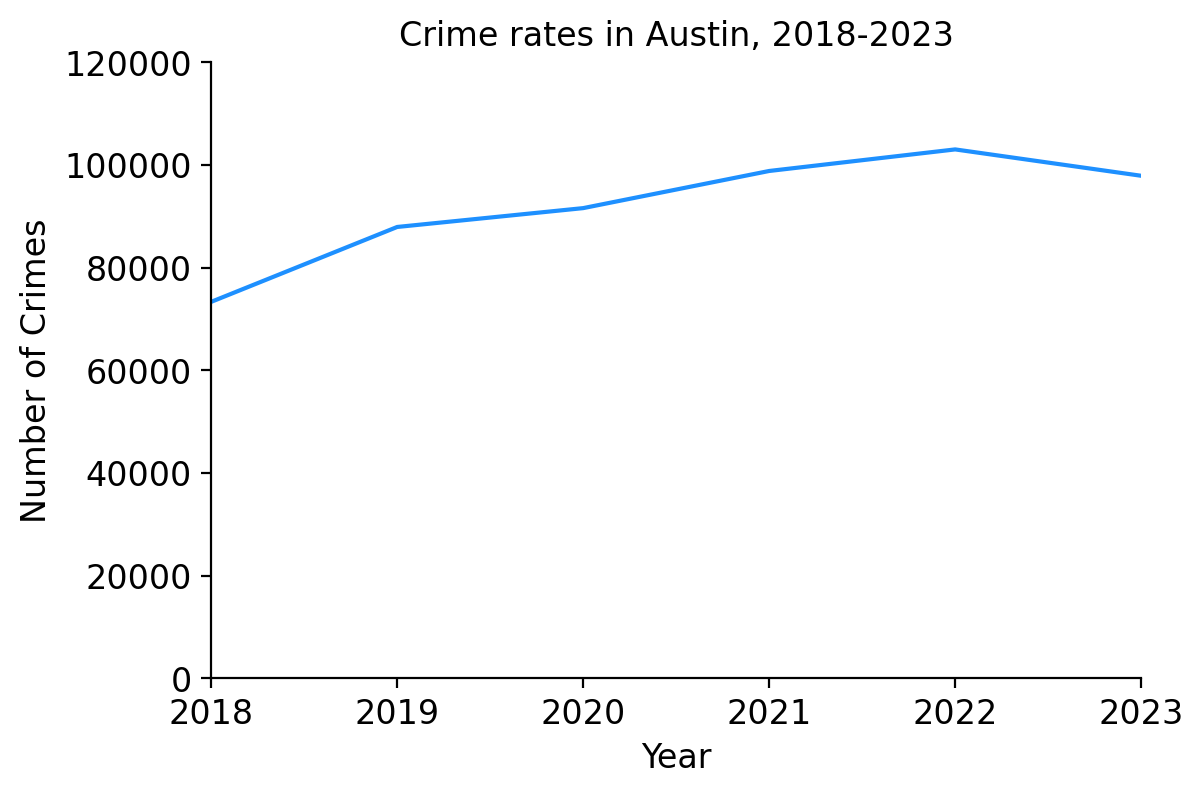

In [281]:
title = 'Crime rates in Austin, 2018-2023'
data = [len(codes2023), len(codes2022), len(codes2021), len(codes2020), len(codes2019), len(codes2018)]
ylim = 120000
time_series_plot(title, data, ylim)

**Crime rates has seen an overall increase across the previous six years. This figure shows the total number of reported crimes, during the years 2018 to 2023. Note that there is an apparent decrease in crime rate between 2022 and 2023.**

---

# Data Visualization - Comparing Rates of Various Crime Categories

My time series analysis above shows a general increase in crime rates, so I will perform a similar analysis, focusing on certain categories of crime. In particular, I will analyze:


*   Murder rates
*   Sexual assault rates
*   Child abuse/exploitation rates





<ipython-input-297-9475ed91e8d4>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pre_crime = np.array([codes2023.loc[:,'Broad Offense Category'], codes2022.loc[:,'Broad Offense Category'], codes2021.loc[:,'Broad Offense Category'], codes2020.loc[:,'Broad Offense Category'], codes2019.loc[:,'Broad Offense Category'], codes2018.loc[:,'Broad Offense Category']])


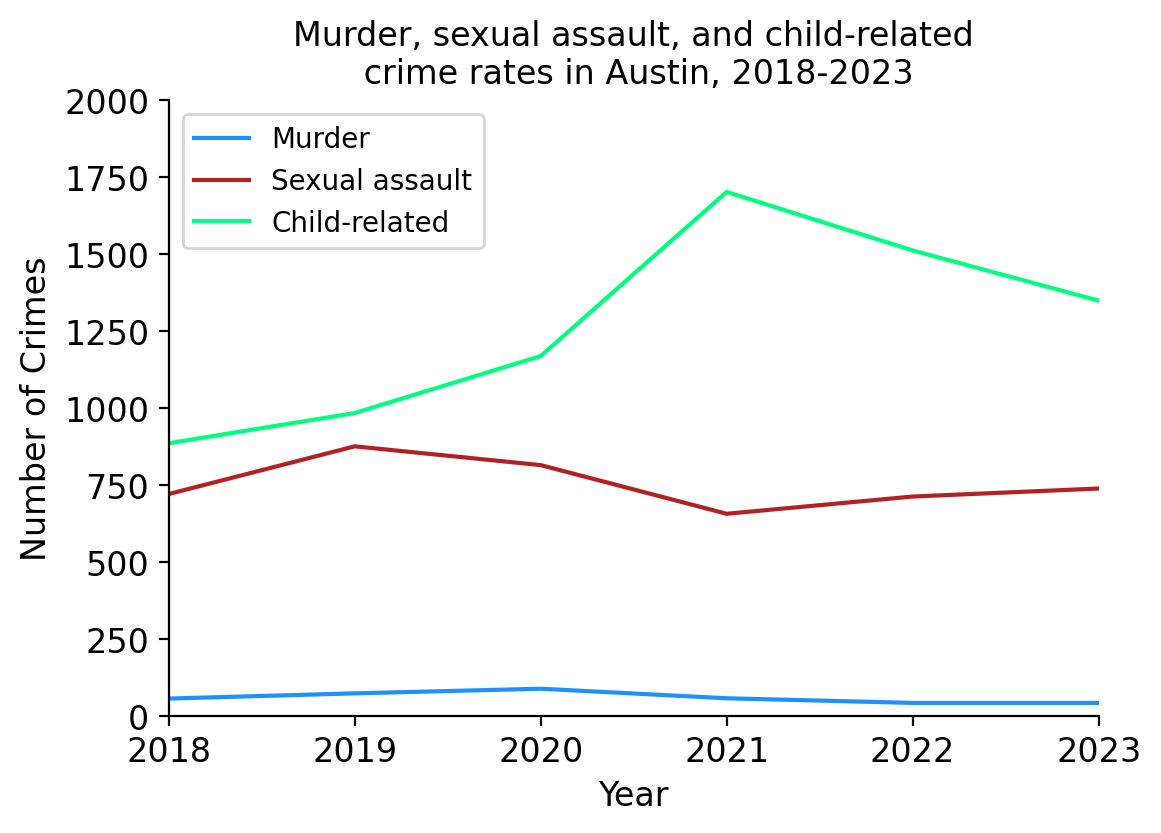

In [297]:
# time series for murder, assault, and child crime rates
title = 'Murder, sexual assault, and child-related\n crime rates in Austin, 2018-2023'

#creating arrays that contain murder, assault, and child crimes
pre_crime = np.array([codes2023.loc[:,'Broad Offense Category'], codes2022.loc[:,'Broad Offense Category'], codes2021.loc[:,'Broad Offense Category'], codes2020.loc[:,'Broad Offense Category'], codes2019.loc[:,'Broad Offense Category'], codes2018.loc[:,'Broad Offense Category']])
murder_array = [len(np.where(offense == 'Murder')[0]) for offense in pre_crime]

sexassault_array = [len(np.where(offense == 'Sexual Assault (Including Minors)')[0]) for offense in pre_crime]

child_array = [len(np.where(offense == 'Child Offenses')[0]) for offense in pre_crime]

time_series_plot(title, murder_array, 2000, 'Murder', sexassault_array, 'Sexual assault', child_array, 'Child-related')

**The figure shows the total number of crimes related to murder, sexual assault, and child abuse/exploitation during 2018-2023. Murder rates have remained constant in Austin during 2018-2023. Sexual assault has remained fairly contant during 2018-2023, whereas child-related crimes have seen a sharp increase.**

Next, I will visualize the proportion of each category of crime. I will make a pie graph to compare crime percentages for each year.

For convenience, I created a function called `create_arrays()`.

`create_arrays()` requires the following arguments:


*   `dataframe` - a pandas dataframe.

In [411]:
# first, I will make arrays for each crime categories
def create_arrays(dataframe):
    pre_crime = dataframe.loc[:, 'Broad Offense Category']

    offense_categories = [
        'Murder', 'Sexual Assault (Including Minors)', 'Child Offenses', 'Rape',
        'Arson', 'Trafficking', 'Kidnapping', 'Prostitution', 'Organized Crime',
        'Theft and Robbery', 'Assault and Violence', 'Forgery and Fraud',
        'Miscellaneous', 'Family Disturbance', 'Perjury', 'Weapon Offenses',
        'Controlled Substance', 'Alcohol Offenses', 'Public Disturbance'
    ]

    # create a list of arrays for each offense category
    offense_counts = {}

    # iterate through each offense category and count occurrences in pre_crime for each year
    for category in offense_categories:
        mask = pre_crime == category
        offense_counts[category] = np.sum(mask)
    # print out the number of offenses to show any slight differences in crime rates over time
    print(offense_counts)
    return offense_counts

{'Murder': 58, 'Sexual Assault (Including Minors)': 722, 'Child Offenses': 887, 'Rape': 270, 'Arson': 174, 'Trafficking': 4, 'Kidnapping': 42, 'Prostitution': 42, 'Organized Crime': 379, 'Theft and Robbery': 26551, 'Assault and Violence': 10128, 'Forgery and Fraud': 2274, 'Miscellaneous': 11606, 'Family Disturbance': 9346, 'Perjury': 113, 'Weapon Offenses': 704, 'Controlled Substance': 2695, 'Alcohol Offenses': 2130, 'Public Disturbance': 2047}


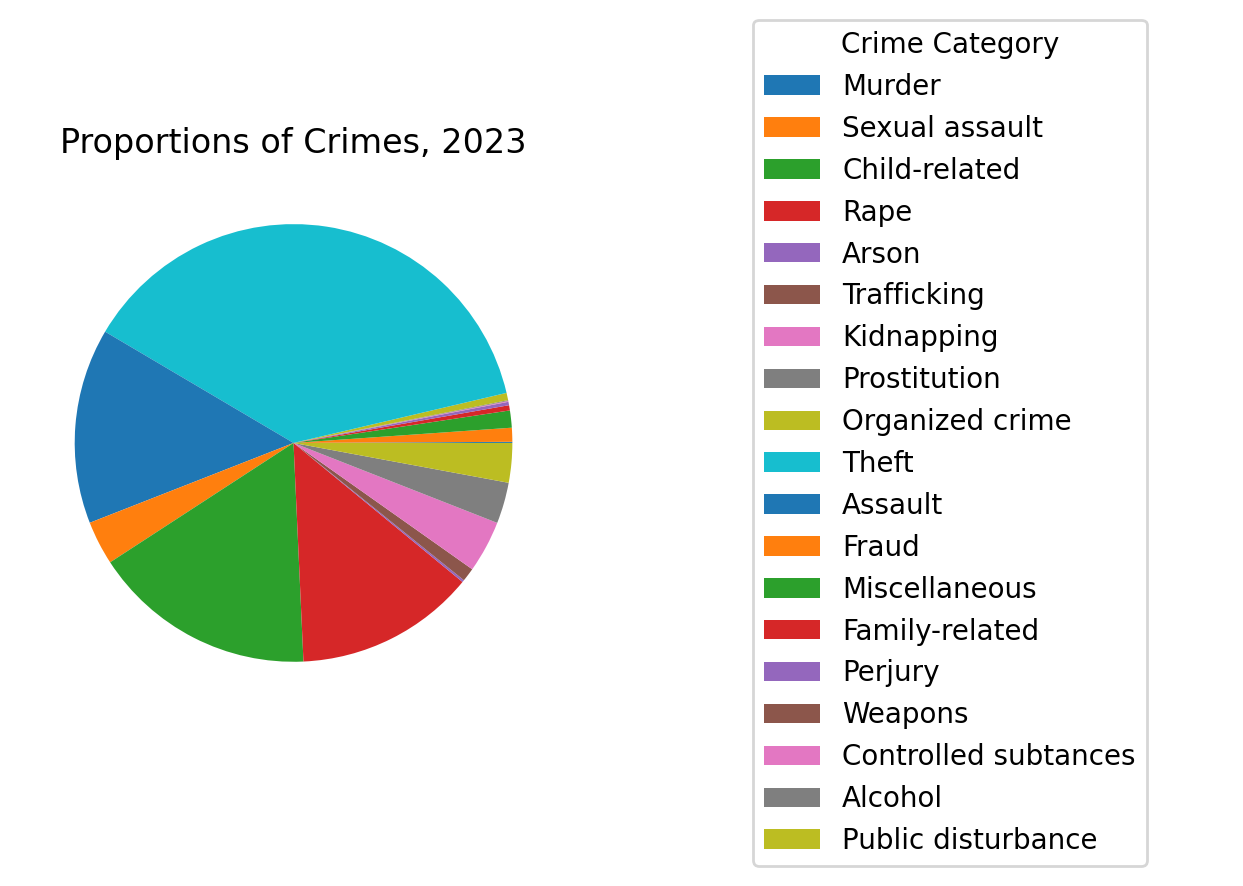

In [412]:
# this shows 2023 crime proportions
plt.figure(figsize=(12,4));

offense_counts = create_arrays(codes2023).values()

labels = ['Murder','Sexual assault', 'Child-related', 'Rape', 'Arson', 'Trafficking', 'Kidnapping', 'Prostitution', 'Organized crime', 'Theft', 'Assault', 'Fraud', 'Miscellaneous', 'Family-related', 'Perjury', 'Weapons', 'Controlled subtances', 'Alcohol',
          'Public disturbance']
plt.subplot(1,3,1) # (rows, columns, position of current plot)
plt.title('Proportions of Crimes, 2023', fontsize=font_size);
plt.pie(offense_counts);

plt.subplot(1,3,2) # legend
pie = plt.pie(offense_counts);
plt.legend(labels, title='Crime Category',loc='center', fontsize=10)
for group in pie:
    for x in group:
        x.set_visible(False)

{'Murder': 75, 'Sexual Assault (Including Minors)': 877, 'Child Offenses': 985, 'Rape': 360, 'Arson': 132, 'Trafficking': 1, 'Kidnapping': 47, 'Prostitution': 35, 'Organized Crime': 430, 'Theft and Robbery': 32169, 'Assault and Violence': 12547, 'Forgery and Fraud': 3488, 'Miscellaneous': 12716, 'Family Disturbance': 11016, 'Perjury': 129, 'Weapon Offenses': 852, 'Controlled Substance': 2653, 'Alcohol Offenses': 2716, 'Public Disturbance': 2350}


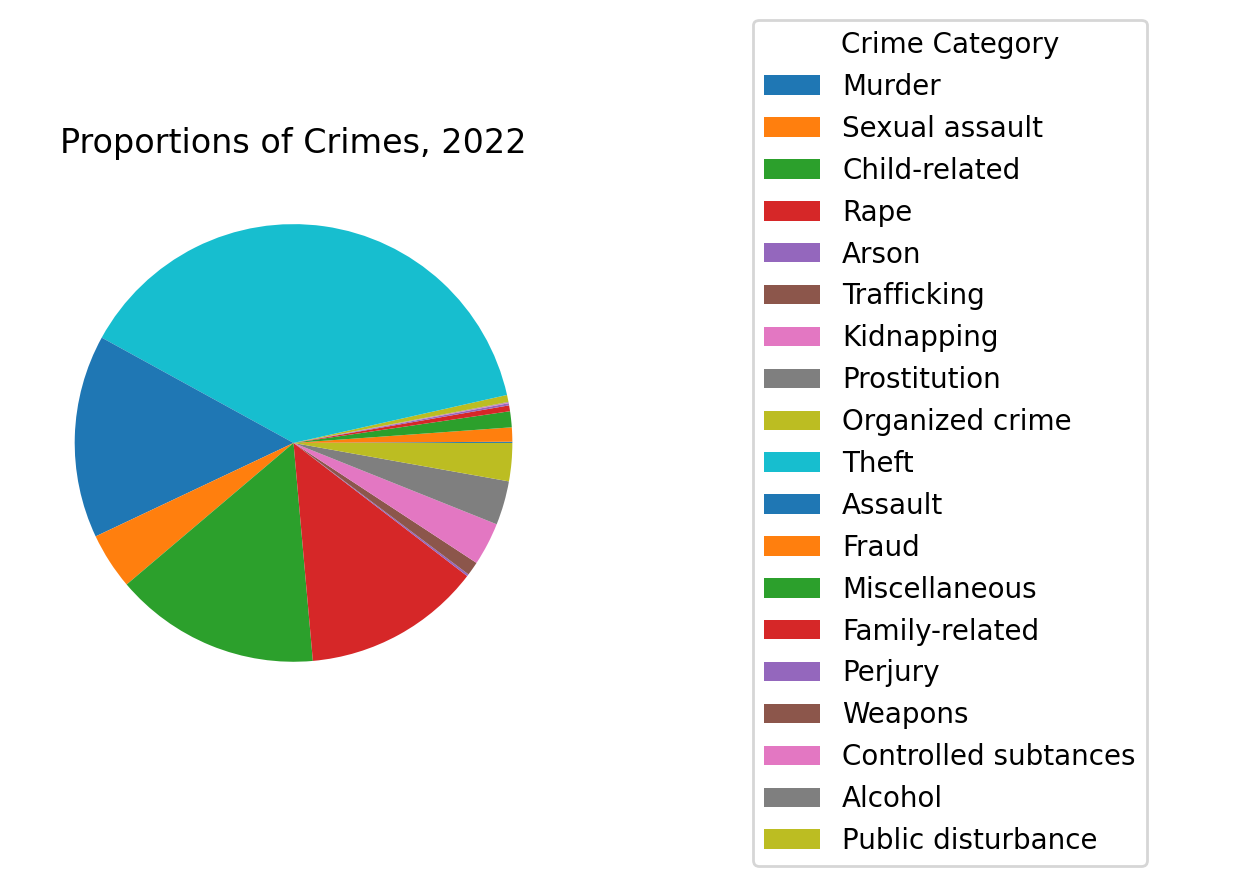

In [413]:
# this shows 2022 crime proportions
plt.figure(figsize=(12,4));

offense_counts = create_arrays(codes2022).values()

labels = ['Murder','Sexual assault', 'Child-related', 'Rape', 'Arson', 'Trafficking', 'Kidnapping', 'Prostitution', 'Organized crime', 'Theft', 'Assault', 'Fraud', 'Miscellaneous', 'Family-related', 'Perjury', 'Weapons', 'Controlled subtances', 'Alcohol',
          'Public disturbance']
plt.subplot(1,3,1) # (rows, columns, position of current plot)
plt.title('Proportions of Crimes, 2022', fontsize=font_size);
plt.pie(offense_counts);

plt.subplot(1,3,2) # legend
pie = plt.pie(offense_counts);
plt.legend(labels, title='Crime Category',loc='center', fontsize=10)
for group in pie:
    for x in group:
        x.set_visible(False)

{'Murder': 90, 'Sexual Assault (Including Minors)': 816, 'Child Offenses': 1170, 'Rape': 323, 'Arson': 168, 'Trafficking': 5, 'Kidnapping': 35, 'Prostitution': 52, 'Organized Crime': 587, 'Theft and Robbery': 28629, 'Assault and Violence': 13067, 'Forgery and Fraud': 3452, 'Miscellaneous': 14183, 'Family Disturbance': 12562, 'Perjury': 120, 'Weapon Offenses': 707, 'Controlled Substance': 2385, 'Alcohol Offenses': 2555, 'Public Disturbance': 2832}


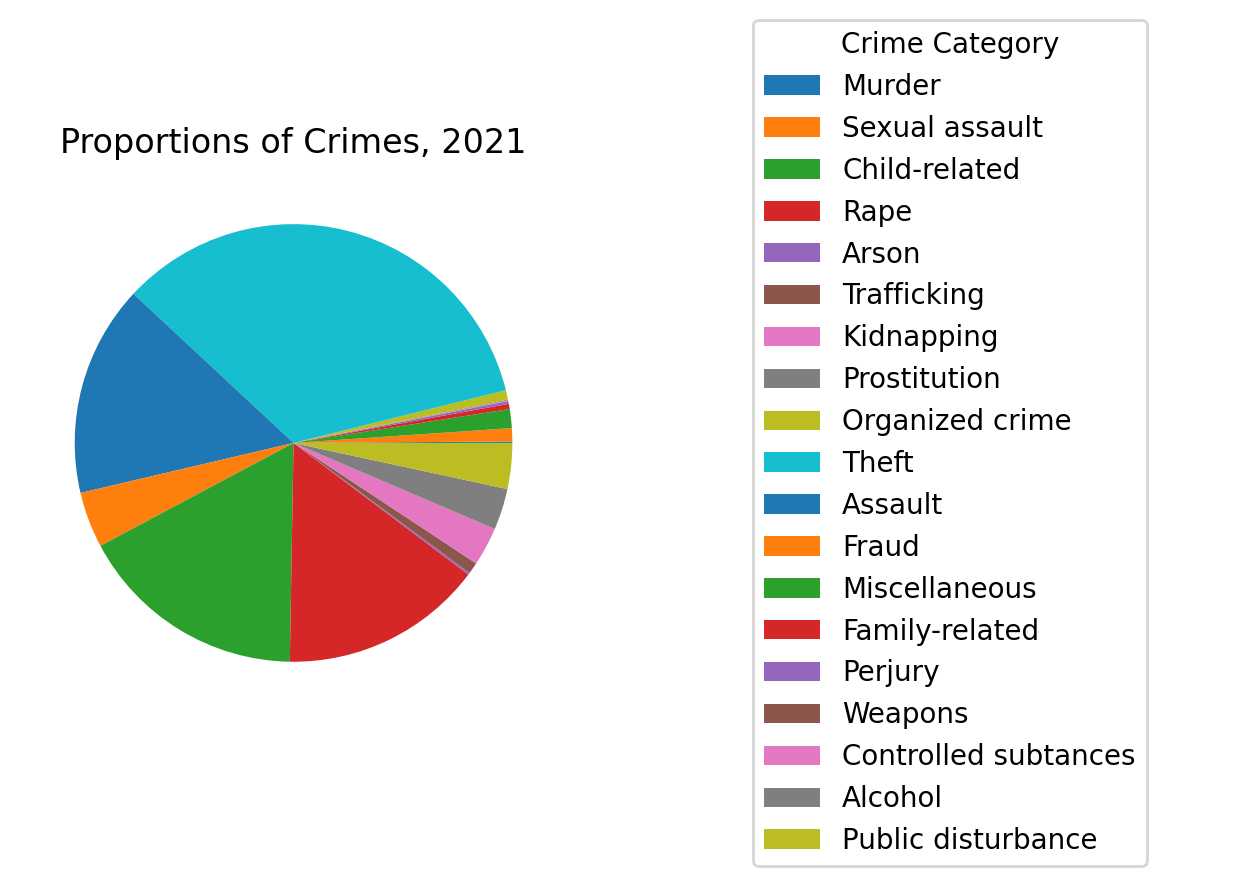

In [414]:
# this shows 2021 crime proportions
plt.figure(figsize=(12,4));

offense_counts = create_arrays(codes2021).values()

labels = ['Murder','Sexual assault', 'Child-related', 'Rape', 'Arson', 'Trafficking', 'Kidnapping', 'Prostitution', 'Organized crime', 'Theft', 'Assault', 'Fraud', 'Miscellaneous', 'Family-related', 'Perjury', 'Weapons', 'Controlled subtances', 'Alcohol',
          'Public disturbance']
plt.subplot(1,3,1) # (rows, columns, position of current plot)
plt.title('Proportions of Crimes, 2021', fontsize=font_size);
plt.pie(offense_counts);

plt.subplot(1,3,2) # legend
pie = plt.pie(offense_counts);
plt.legend(labels, title='Crime Category',loc='center', fontsize=10)
for group in pie:
    for x in group:
        x.set_visible(False)

{'Murder': 59, 'Sexual Assault (Including Minors)': 658, 'Child Offenses': 1703, 'Rape': 351, 'Arson': 122, 'Trafficking': 3, 'Kidnapping': 30, 'Prostitution': 67, 'Organized Crime': 667, 'Theft and Robbery': 34468, 'Assault and Violence': 12684, 'Forgery and Fraud': 4094, 'Miscellaneous': 16443, 'Family Disturbance': 13597, 'Perjury': 124, 'Weapon Offenses': 569, 'Controlled Substance': 3144, 'Alcohol Offenses': 3037, 'Public Disturbance': 2954}


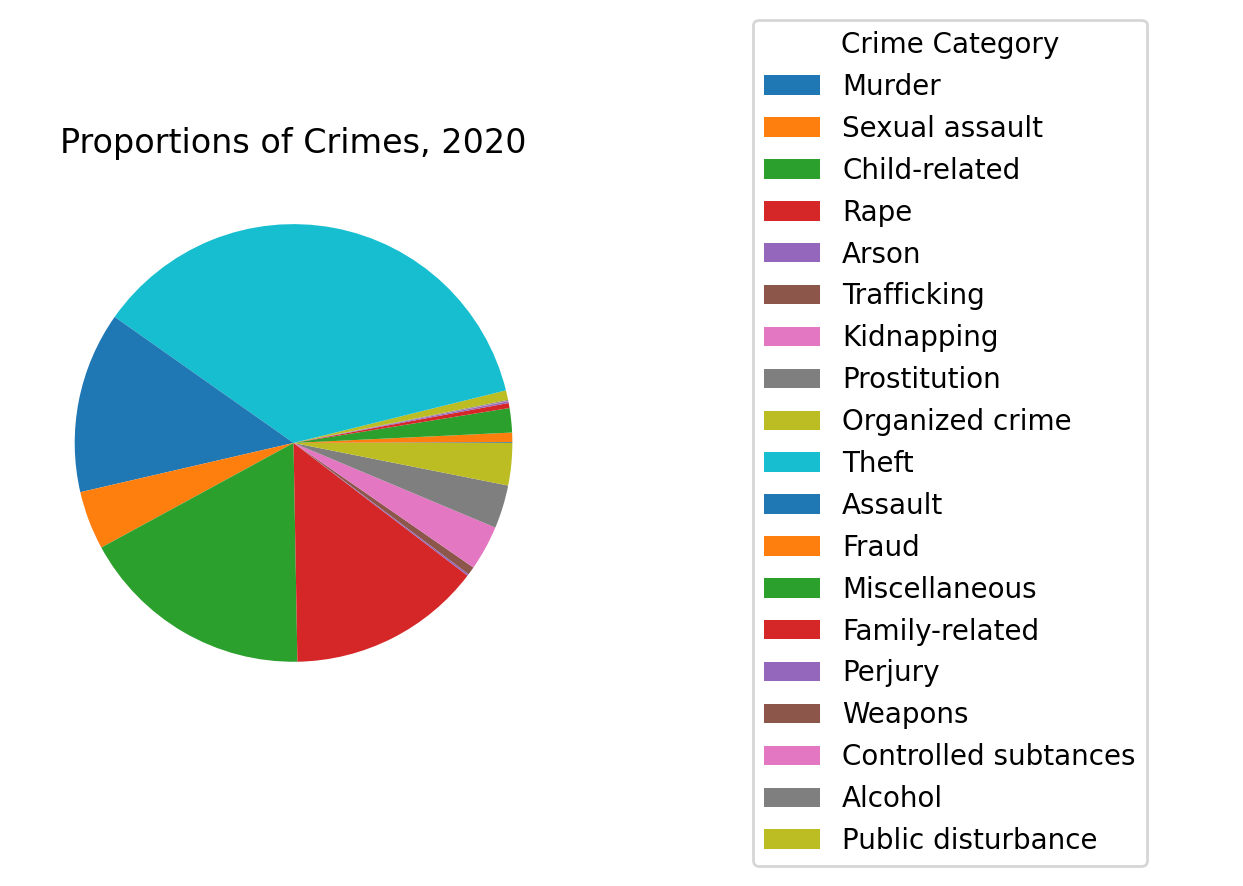

In [415]:
# this shows 2020 crime proportions
plt.figure(figsize=(12,4));

offense_counts = create_arrays(codes2020).values()

labels = ['Murder','Sexual assault', 'Child-related', 'Rape', 'Arson', 'Trafficking', 'Kidnapping', 'Prostitution', 'Organized crime', 'Theft', 'Assault', 'Fraud', 'Miscellaneous', 'Family-related', 'Perjury', 'Weapons', 'Controlled subtances', 'Alcohol',
          'Public disturbance']
plt.subplot(1,3,1) # (rows, columns, position of current plot)
plt.title('Proportions of Crimes, 2020', fontsize=font_size);
plt.pie(offense_counts);

plt.subplot(1,3,2) # legend
pie = plt.pie(offense_counts);
plt.legend(labels, title='Crime Category',loc='center', fontsize=10)
for group in pie:
    for x in group:
        x.set_visible(False)

{'Murder': 44, 'Sexual Assault (Including Minors)': 714, 'Child Offenses': 1513, 'Rape': 356, 'Arson': 95, 'Trafficking': 8, 'Kidnapping': 29, 'Prostitution': 61, 'Organized Crime': 642, 'Theft and Robbery': 36105, 'Assault and Violence': 12911, 'Forgery and Fraud': 4381, 'Miscellaneous': 16976, 'Family Disturbance': 14008, 'Perjury': 185, 'Weapon Offenses': 607, 'Controlled Substance': 4839, 'Alcohol Offenses': 4027, 'Public Disturbance': 2764}


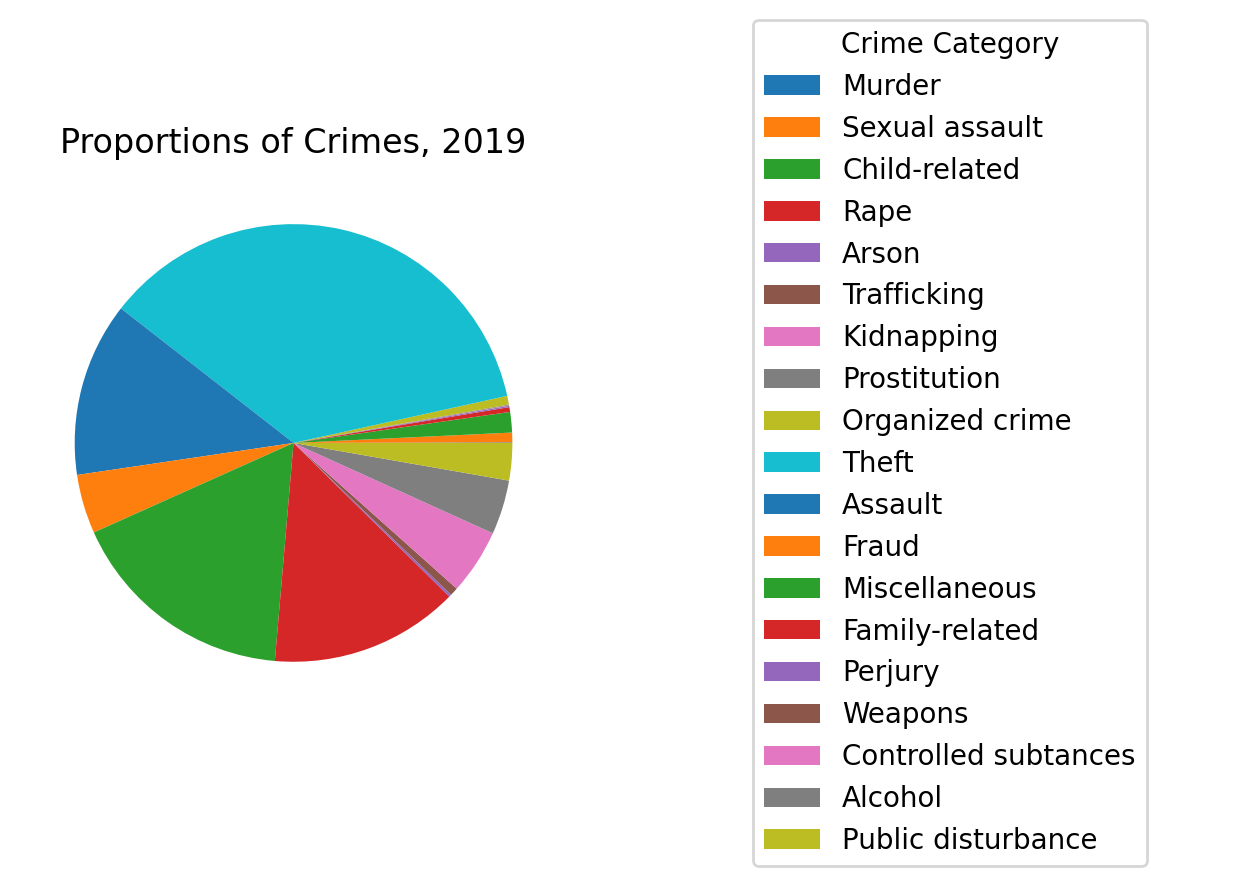

In [416]:
# this shows 2019 crime proportions
plt.figure(figsize=(12,4));

offense_counts = create_arrays(codes2019).values()

labels = ['Murder','Sexual assault', 'Child-related', 'Rape', 'Arson', 'Trafficking', 'Kidnapping', 'Prostitution', 'Organized crime', 'Theft', 'Assault', 'Fraud', 'Miscellaneous', 'Family-related', 'Perjury', 'Weapons', 'Controlled subtances', 'Alcohol',
          'Public disturbance']
plt.subplot(1,3,1) # (rows, columns, position of current plot)
plt.title('Proportions of Crimes, 2019', fontsize=font_size);
plt.pie(offense_counts);

plt.subplot(1,3,2) # legend
pie = plt.pie(offense_counts);
plt.legend(labels, title='Crime Category',loc='center', fontsize=10)
for group in pie:
    for x in group:
        x.set_visible(False)

{'Murder': 44, 'Sexual Assault (Including Minors)': 740, 'Child Offenses': 1350, 'Rape': 389, 'Arson': 64, 'Trafficking': 10, 'Kidnapping': 43, 'Prostitution': 96, 'Organized Crime': 623, 'Theft and Robbery': 32356, 'Assault and Violence': 12085, 'Forgery and Fraud': 4084, 'Miscellaneous': 15824, 'Family Disturbance': 14477, 'Perjury': 177, 'Weapon Offenses': 561, 'Controlled Substance': 5797, 'Alcohol Offenses': 4130, 'Public Disturbance': 2263}


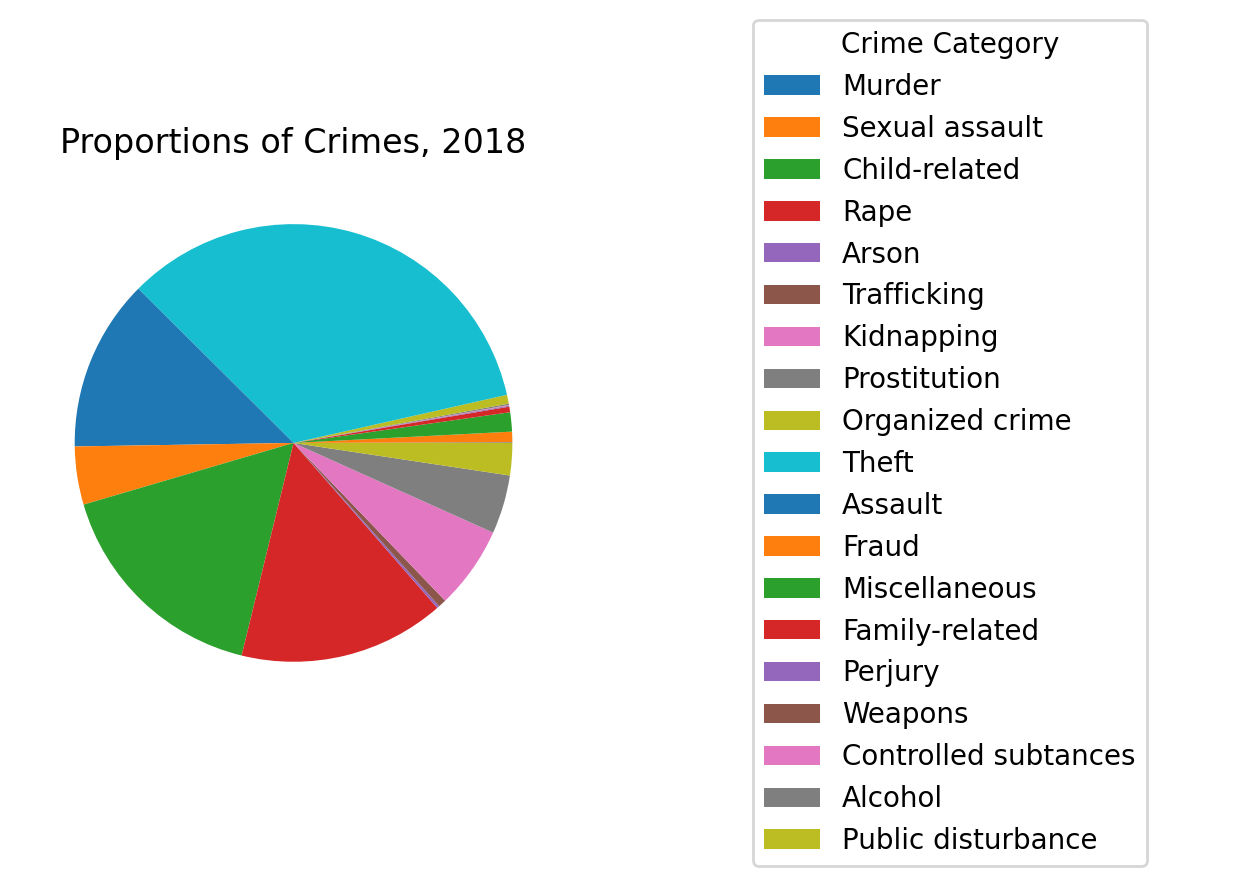

In [417]:
# this shows 2018 crime proportions
plt.figure(figsize=(12,4));

offense_counts = create_arrays(codes2018).values()

labels = ['Murder','Sexual assault', 'Child-related', 'Rape', 'Arson', 'Trafficking', 'Kidnapping', 'Prostitution', 'Organized crime', 'Theft', 'Assault', 'Fraud', 'Miscellaneous', 'Family-related', 'Perjury', 'Weapons', 'Controlled subtances', 'Alcohol',
          'Public disturbance']
plt.subplot(1,3,1) # (rows, columns, position of current plot)
plt.title('Proportions of Crimes, 2018', fontsize=font_size);
plt.pie(offense_counts);

plt.subplot(1,3,2) # legend
pie = plt.pie(offense_counts);
plt.legend(labels, title='Crime Category',loc='center', fontsize=10)
for group in pie:
    for x in group:
        x.set_visible(False)

**Figure Legend (for all pie charts above)**

**Proportions of crime have stayed remarkably consistent during 2018-2023. Each figure shows the proportion of each category of crime from a given year. The most frequently occuring crimes include theft, assault, miscellaneous crimes, family-related crimes, and controlled substance crimes.**

---

# Discussion

There are two key takeaways from my analysis: one, crime rates show an overall increase in frequency during 2018-2023; two, the proportions of crime that occur in Austin remain remarkably consistent. In particular, rates of theft, family-related crimes, and assault have hardly changed during this time period. Current data from 2023 suggests that crime rates may be decreasing, but it is important to note that data remains incomplete, and the year is still in progress.  

The most significant limitation of this analysis is that it does not account for crimes that may not have been reported. Unfortunately, not all crimes are reported to the police, so reports are not written and data cannot be gathered on the nature of such crimes. There are very few things that can be done about this fact, so this analysis will always show an estimation of crime rates and proportions in Austin.

Other limitations to this analysis include:
*   Subjective categorization of crimes.
*   Per the Austin Police Department, each incident only associates with the highest level offense of that incident; it is possible for an incident to have more than one level of offense associated with it.
*   Per the Austin Police Deparment, data from this database may differ from other databases.




